Turning the sample Figma course graphs into a visualizeable graph. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import re
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def create_knowledge_graph(input_string):
    # Create a directed graph
    G = nx.DiGraph()

    # Split the input string into lines
    lines = input_string.strip().split('\n')

    # Process each line
    for line in lines:
        # Extract the source concept, relationship, and target concept using regex
        match = re.match(r'\[(.*?)\] -> \((.*?)\) -> \[(.*?)\]', line.strip())
        if match:
            source_concept = match.group(1)
            relationship = match.group(2)
            target_concept = match.group(3)

            # Add nodes to the graph if they don't exist
            if not G.has_node(source_concept):
                G.add_node(source_concept)
            if not G.has_node(target_concept):
                G.add_node(target_concept)

            # Add the edge between the source and target concepts with the relationship as the edge label
            G.add_edge(source_concept, target_concept, label=relationship)

    return G

In [3]:
sample_graph=f"""[Design system strategy_1] -> (aligns with_3) -> [organizational goals and objectives_3]
[Design system strategy_1] -> (defines_2) -> [success metrics and KPIs_2]
[Design system strategy_1] -> (guides_4) -> [resource allocation and prioritization_4]
[Design system strategy_1] -> (requires_1) -> [stakeholder alignment and buy-in_1]
[Design system strategy_1] -> (informs_2) -> [design system roadmap and milestones_2]

[Design system roadmap_2] -> (prioritizes_3) -> [high-impact components and patterns_3]
[Design system roadmap_2] -> (balances_4) -> [short-term needs and long-term scalability_4]
[Design system roadmap_2] -> (aligns with_1) -> [product development lifecycles_1]
[Design system roadmap_2] -> (requires_2) -> [regular review and adaptation_2]
[Design system roadmap_2] -> (communicates_3) -> [timeline, milestones, and dependencies_3]

[Design principles_2] -> (guide_3) -> [design decision-making and prioritization_3]
[Design principles_2] -> (ensure_4) -> [alignment with brand identity and values_4]
[Design principles_2] -> (serve as_1) -> [foundation for design language and patterns_1]
[Design principles_2] -> (evolve with_2) -> [user needs and business goals_2]
[Design principles_2] -> (promote_4) -> [consistency and coherence across products_4]

[Component-driven design_3] -> (enables_1) -> [modular and reusable design assets_1]
[Component-driven design_3] -> (accelerates_4) -> [design and development velocity_4]
[Component-driven design_3] -> (ensures_2) -> [consistency across features and products_2]
[Component-driven design_3] -> (requires_3) -> [well-defined component architecture and APIs_3]
[Component-driven design_3] -> (supports_4) -> [scalable and maintainable design systems_4]

[Design tokens_4] -> (establish_1) -> [consistent visual language_1]
[Design tokens_4] -> (enable_2) -> [easy updates and maintenance_2]
[Design tokens_4] -> (support_3) -> [multi-platform and multi-brand design_3]
[Design tokens_4] -> (require_4) -> [integration with development workflows_4]
[Design tokens_4] -> (promote_2) -> [design efficiency and consistency at scale_2]

[Accessibility best practices_1] -> (ensure_2) -> [inclusive and equitable user experiences_2]
[Accessibility best practices_1] -> (align with_3) -> [industry standards and regulations_3]
[Accessibility best practices_1] -> (require_4) -> [ongoing testing and auditing_4]
[Accessibility best practices_1] -> (influence_1) -> [component design and behavior_1]
[Accessibility best practices_1] -> (demonstrate_3) -> [commitment to diversity and inclusion_3]

[Responsive design patterns_2] -> (enable_3) -> [seamless experiences across devices_3]
[Responsive design patterns_2] -> (utilize_4) -> [flexible grids, layouts, and breakpoints_4]
[Responsive design patterns_2] -> (optimize_1) -> [performance and loading times_1]
[Responsive design patterns_2] -> (require_2) -> [thorough testing and quality assurance_2]
[Responsive design patterns_2] -> (enhance_4) -> [user engagement and satisfaction_4]

[Collaborative design workflows_3] -> (streamline_4) -> [design handoff and implementation_4]
[Collaborative design workflows_3] -> (facilitate_1) -> [cross-functional communication and alignment_1]
[Collaborative design workflows_3] -> (leverage_2) -> [version control and feedback mechanisms_2]
[Collaborative design workflows_3] -> (enable_3) -> [parallel and iterative design processes_3]
[Collaborative design workflows_3] -> (foster_4) -> [transparency, accountability, and shared ownership_4]

[Figma design system library_4] -> (serves as_1) -> [single source of truth for UI components_1]
[Figma design system library_4] -> (enables_2) -> [efficient component reuse and updates_2]
[Figma design system library_4] -> (enforces_3) -> [design consistency and standards compliance_3]
[Figma design system library_4] -> (requires_4) -> [governance and contribution processes_4]
[Figma design system library_4] -> (accelerates_2) -> [onboarding and training of designers_2]

[Figma auto layout_2] -> (enables_3) -> [responsive and adaptive component design_3]
[Figma auto layout_2] -> (reduces_4) -> [manual layout efforts and inconsistencies_4]
[Figma auto layout_2] -> (supports_1) -> [flexible and dynamic UI compositions_1]
[Figma auto layout_2] -> (requires_2) -> [thoughtful planning and structure_2]
[Figma auto layout_2] -> (enhances_3) -> [design efficiency and consistency_3]

[Figma variants_3] -> (enable_4) -> [efficient management of component states and variations_4]
[Figma variants_3] -> (reduce_1) -> [design complexity and redundancy_1]
[Figma variants_3] -> (support_2) -> [rapid prototyping and user testing_2]
[Figma variants_3] -> (require_3) -> [clear naming and organization conventions_3]
[Figma variants_3] -> (promote_4) -> [modularity, flexibility, and maintainability_4]

[Interactive prototyping_4] -> (facilitates_1) -> [user testing and feedback collection_1]
[Interactive prototyping_4] -> (validates_2) -> [design concepts and assumptions_2]
[Interactive prototyping_4] -> (communicates_3) -> [interactive behaviors and transitions_3]
[Interactive prototyping_4] -> (reduces_4) -> [development rework and iterations_4]
[Interactive prototyping_4] -> (accelerates_2) -> [stakeholder buy-in and decision-making_2]

[Design system documentation_1] -> (communicates_2) -> [usage guidelines and best practices_2]
[Design system documentation_1] -> (facilitates_3) -> [onboarding and training of team members_3]
[Design system documentation_1] -> (serves as_4) -> [reference for design and development teams_4]
[Design system documentation_1] -> (requires_1) -> [regular updates and maintenance_1]
[Design system documentation_1] -> (promotes_3) -> [adoption and consistent use of the design system_3]

[Design system governance_2] -> (establishes_3) -> [roles, responsibilities, and decision-making processes_3]
[Design system governance_2] -> (ensures_4) -> [design quality, consistency, and compliance_4]
[Design system governance_2] -> (facilitates_1) -> [design system evolution and growth_1]
[Design system governance_2] -> (requires_2) -> [ongoing collaboration and communication_2]
[Design system governance_2] -> (aligns_4) -> [design system with organizational objectives_4]

[Continuous improvement processes_3] -> (enable_1) -> [design system scalability and longevity_1]
[Continuous improvement processes_3] -> (leverage_4) -> [data, metrics, and user feedback_4]
[Continuous improvement processes_3] -> (identify_2) -> [areas for optimization and innovation_2]
[Continuous improvement processes_3] -> (involve_3) -> [cross-functional collaboration and input_3]
[Continuous improvement processes_3] -> (drive_2) -> [iterative refinement and evolution_2]

[Design system adoption strategy_4] -> (tailors_1) -> [rollout approach to organizational needs_1]
[Design system adoption strategy_4] -> (addresses_2) -> [cultural, technical, and process considerations_2]
[Design system adoption strategy_4] -> (provides_3) -> [training, support, and resources_3]
[Design system adoption strategy_4] -> (measures_4) -> [success metrics and milestones_4]
[Design system adoption strategy_4] -> (requires_1) -> [leadership buy-in and advocacy_1]

[Figma community and ecosystem_2] -> (facilitates_3) -> [knowledge sharing and collaboration_3]
[Figma community and ecosystem_2] -> (provides_4) -> [plugins, templates, and resources_4]
[Figma community and ecosystem_2] -> (accelerates_1) -> [skill development and inspiration_1]
[Figma community and ecosystem_2] -> (enables_2) -> [integration with other tools and platforms_2]
[Figma community and ecosystem_2] -> (fosters_4) -> [innovation and best practice sharing_4]
"""

In [4]:
knowledge_graph = create_knowledge_graph(sample_graph)

# Print the nodes and edges of the knowledge graph
print("Nodes:", list(knowledge_graph.nodes()))
print("Edges:", list(knowledge_graph.edges(data=True)))

Nodes: ['Design system strategy_1', 'organizational goals and objectives_3', 'success metrics and KPIs_2', 'resource allocation and prioritization_4', 'stakeholder alignment and buy-in_1', 'design system roadmap and milestones_2', 'Design system roadmap_2', 'high-impact components and patterns_3', 'short-term needs and long-term scalability_4', 'product development lifecycles_1', 'regular review and adaptation_2', 'timeline, milestones, and dependencies_3', 'Design principles_2', 'design decision-making and prioritization_3', 'alignment with brand identity and values_4', 'foundation for design language and patterns_1', 'user needs and business goals_2', 'consistency and coherence across products_4', 'Component-driven design_3', 'modular and reusable design assets_1', 'design and development velocity_4', 'consistency across features and products_2', 'well-defined component architecture and APIs_3', 'scalable and maintainable design systems_4', 'Design tokens_4', 'consistent visual langu

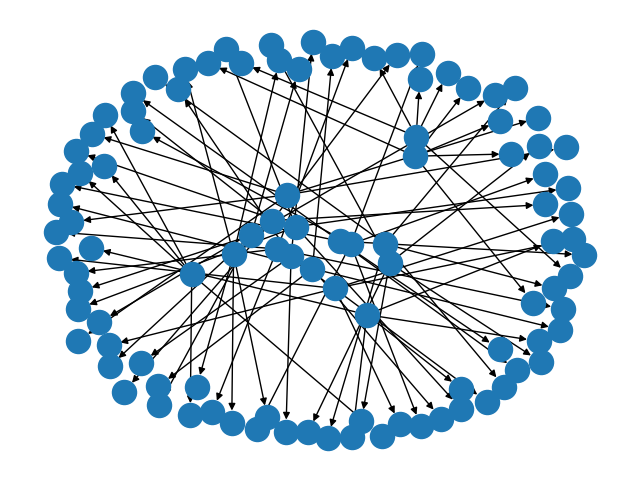

In [5]:
fig = plt.figure()
nx.draw(knowledge_graph)

In [6]:


def generate_colorblind_palette(num_colors):
    # Define the color-blind friendly color palette
    colorblind_colors = [
        '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442',
        '#56B4E9', '#E69F00', '#000000', '#0072B2', '#009E73',
        '#D55E00', '#CC79A7', '#F0E442', '#56B4E9', '#E69F00'
    ]
    
    # Extend the color palette if more colors are needed
    if num_colors > len(colorblind_colors):
        additional_colors = plt.cm.get_cmap('tab20', num_colors - len(colorblind_colors))
        colorblind_colors.extend(additional_colors(np.linspace(0, 1, num_colors - len(colorblind_colors))))
    
    # Create a color map and normalize it
    cmap = mcolors.ListedColormap(colorblind_colors[:num_colors])
    norm = mcolors.Normalize(vmin=0, vmax=num_colors - 1)
    
    return cmap, norm



/var/folders/qm/vnrd_4ln0tv_3fv2sjtrcw040000gn/T/ipykernel_77155/2659627813.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  additional_colors = plt.cm.get_cmap('tab20', num_colors - len(colorblind_colors))
/Users/cck/mambaforge/envs/figma-llm/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


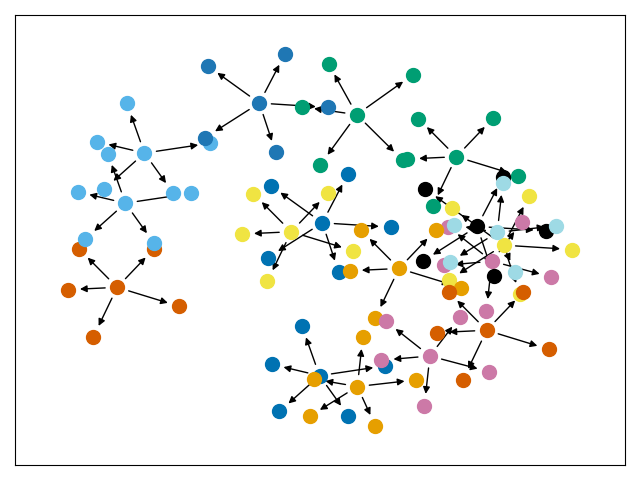

In [7]:
G = knowledge_graph

fig = plt.figure()

communities = nx.community.greedy_modularity_communities(G)

# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=3, seed=429)

# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))

# colors 
# Generate color-blind friendly color palette
cmap, norm = generate_colorblind_palette(len(communities))

# Nodes colored by cluster
for nodes, clr in zip(communities, cmap.colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=100);
nx.draw_networkx_edges(G, pos=pos);

plt.tight_layout()
plt.show()

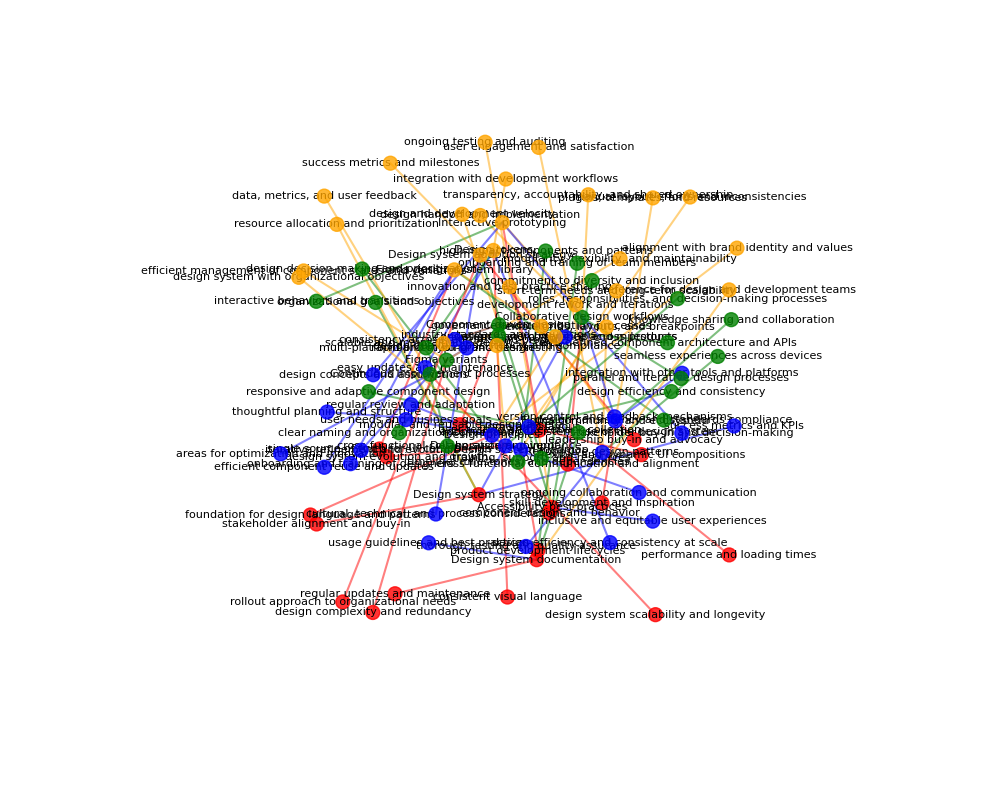

In [8]:
# Extract the levels from node labels
levels = [int(node.split('_')[-1]) for node in G.nodes()]

# Create a dictionary to map levels to colors
level_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Position the nodes in 3D space based on their levels
pos = nx.spring_layout(G, dim=3, seed=42)
node_positions = {}
for node, (x, y, z) in pos.items():
    level = int(node.split('_')[-1])
    node_positions[node] = (x, y, level - 1)  # Adjust the level to start from 0

# Draw the nodes
for level in range(1, 5):
    level_nodes = [node for node in G.nodes() if int(node.split('_')[-1]) == level]
    node_coords = np.array([node_positions[node] for node in level_nodes])
    ax.scatter(node_coords[:, 0], node_coords[:, 1], node_coords[:, 2],
               c=level_colors[level], s=100, alpha=0.8)

    # Add node labels
    for node in level_nodes:
        x, y, z = node_positions[node]
        ax.text(x, y, z, node.split('_')[0], fontsize=8, ha='center', va='center')

# Draw the edges
for edge in G.edges(data=True):
    src, dst, data = edge
    src_pos = node_positions[src]
    dst_pos = node_positions[dst]
    edge_color = level_colors[int(data['label'].split('_')[-1])]
    ax.plot([src_pos[0], dst_pos[0]], [src_pos[1], dst_pos[1]], [src_pos[2], dst_pos[2]],
            color=edge_color, alpha=0.5)

# Rotate the graph for better visualization
ax.view_init(30, 45)

# Remove axis labels
ax.set_axis_off()

# Display the graph
plt.tight_layout()
plt.show()

In [9]:
nx.to_pandas_edgelist(G)

,source,target,label
0,Design system strategy_1,organizational goals and objectives_3,aligns with_3
1,Design system strategy_1,success metrics and KPIs_2,defines_2
2,Design system strategy_1,resource allocation and prioritization_4,guides_4
3,Design system strategy_1,stakeholder alignment and buy-in_1,requires_1
4,Design system strategy_1,design system roadmap and milestones_2,informs_2
...,...,...,...
80,Figma community and ecosystem_2,knowledge sharing and collaboration_3,facilitates_3
81,Figma community and ecosystem_2,"plugins, templates, and resources_4",provides_4
82,Figma community and ecosystem_2,skill development and inspiration_1,accelerates_1
83,Figma community and ecosystem_2,integration with other tools and platforms_2,enables_2
